In [1]:
import os, sys
import torch

dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
dir0 = os.path.dirname(dir1)  # One level above dir1


if dir1 not in sys.path: sys.path.append(dir0)

from src.config import PPOConfig, EmbeddingStrategy
from src.experiments import ExperimentSuite
from src.utils import ExperimentUtils



def tune_epochs(strategy, file_name, epochs):
    url = "saved_experiments" + "/" + file_name
    base_config_balance_5_agents = PPOConfig(
        n_agents=5, scenario_name='balance', decentralized_execution=False, n_iters=100,
        max_steps=200, strategy=strategy, profile=False
    )

    param_grid = {
        "num_epochs": epochs,
    }
    my_device = torch.device("cpu")
    suite = ExperimentSuite(base_config=base_config_balance_5_agents, param_grid=param_grid, name="test_all", device=my_device)
    suite.run_all_confidence(k=3)
    suite_utils = ExperimentUtils(path=url, experiment_suite=suite)
    suite_utils.save_df_to_file()
    suite_utils.plot_experiment_suite_df()
    print(suite_utils.create_table_with_confidence())

In [3]:
tune_epochs(EmbeddingStrategy.MLP_GLOBAL, "concat_tune_epochs_2468.csv", epochs=[8])

2025-06-22 14:54:57,290 [torchrl][INFO] check_env_specs succeeded!
2025-06-22 14:54:57,323 [torchrl][INFO] check_env_specs succeeded!

episode_reward_mean = 86.6961898803711: 100%|██████████| 100/100 [03:03<00:00,  1.84s/it] 
2025-06-22 14:58:00,930 [torchrl][INFO] Training time: 79.56 seconds
2025-06-22 14:58:00,934 [torchrl][INFO] macs: 14.31 MMac  Params: 7.15 k
2025-06-22 14:58:02,078 [torchrl][INFO] check_env_specs succeeded!
2025-06-22 14:58:02,126 [torchrl][INFO] check_env_specs succeeded!

episode_reward_mean = 69.7476577758789:  31%|███       | 31/100 [00:57<02:11,  1.90s/it]

KeyboardInterrupt: 

2025-06-07 12:57:09,430 [torchrl][INFO] check_env_specs succeeded!
2025-06-07 12:57:09,501 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 107.93643188476562: 100%|██████████| 100/100 [02:34<00:00,  1.54s/it]
2025-06-07 12:59:43,700 [torchrl][INFO] Training time: 66.94 seconds
2025-06-07 12:59:43,702 [torchrl][INFO] macs: 18.82 MMac  Params: 9.41 k
2025-06-07 12:59:44,650 [torchrl][INFO] check_env_specs succeeded!
2025-06-07 12:59:44,690 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 122.2762222290039: 100%|██████████| 100/100 [02:34<00:00,  1.55s/it]
2025-06-07 13:02:19,492 [torchrl][INFO] Training time: 68.04 seconds
2025-06-07 13:02:19,494 [torchrl][INFO] macs: 18.82 MMac  Params: 9.41 k
2025-06-07 13:02:20,435 [torchrl][INFO] check_env_specs succeeded!
2025-06-07 13:02:20,475 [torchrl][INFO] check_env_specs succeeded!
episode_reward_mean = 108.08020782470703: 100%|██████████| 100/100 [02:33<00:00,  1.54s/it]
2025-06-07 13:04:54,134 [torchrl][INFO]

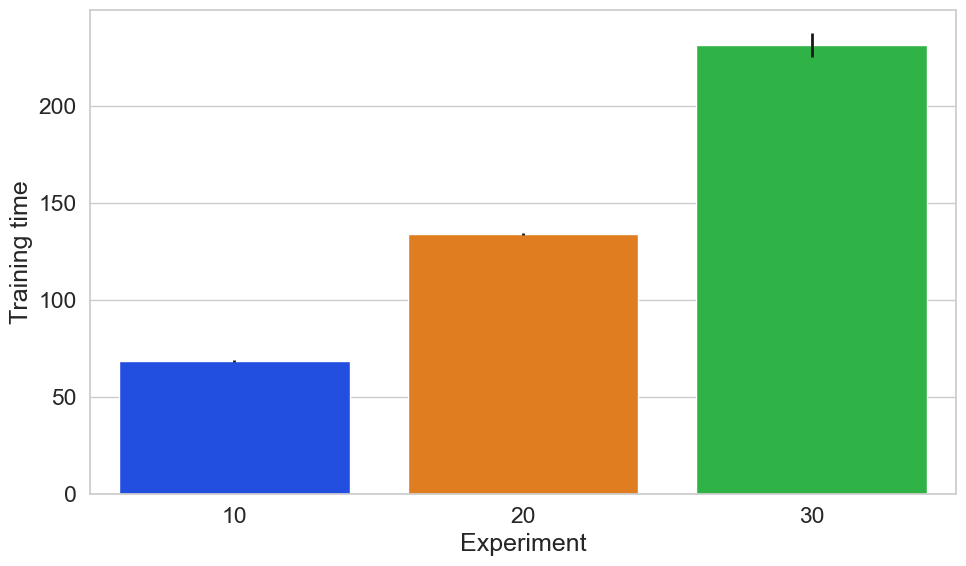

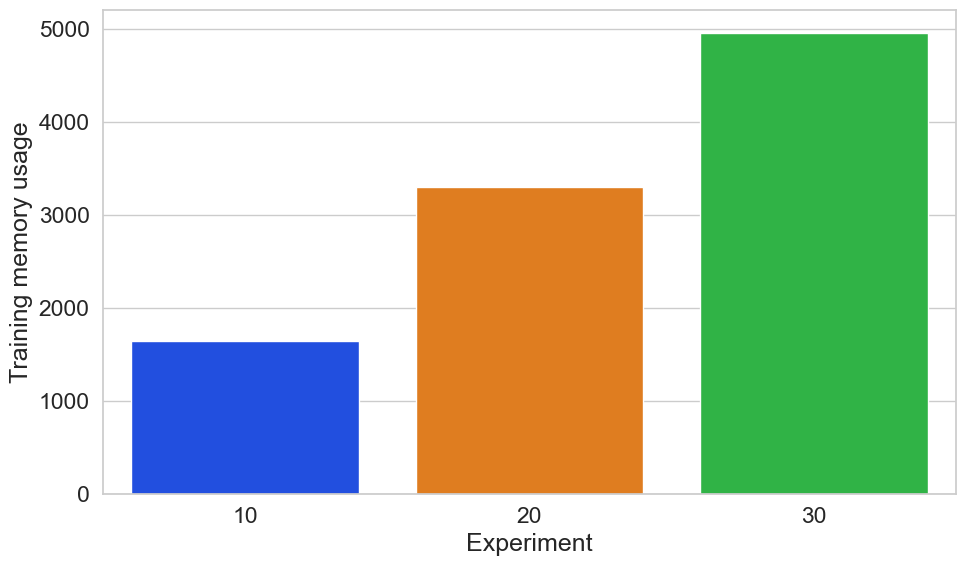

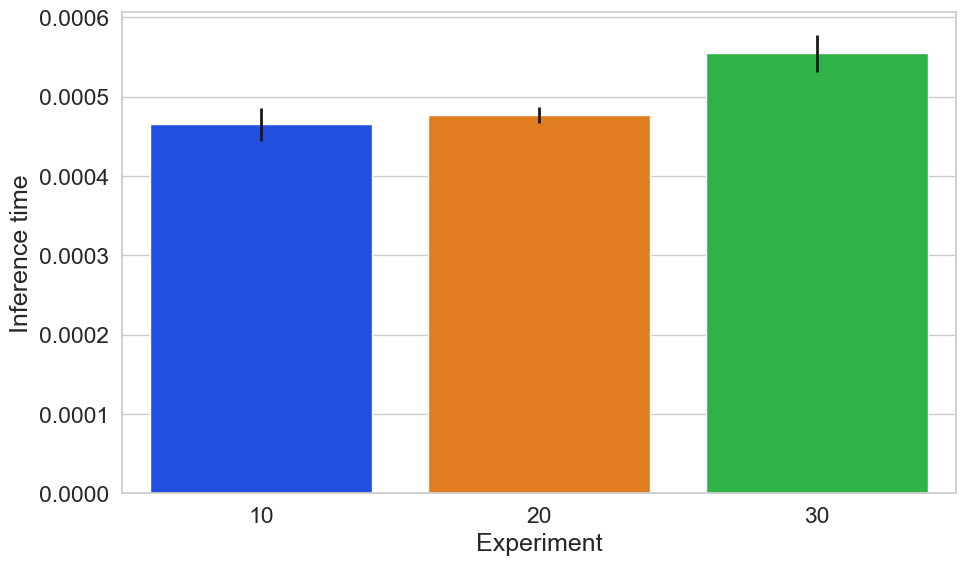

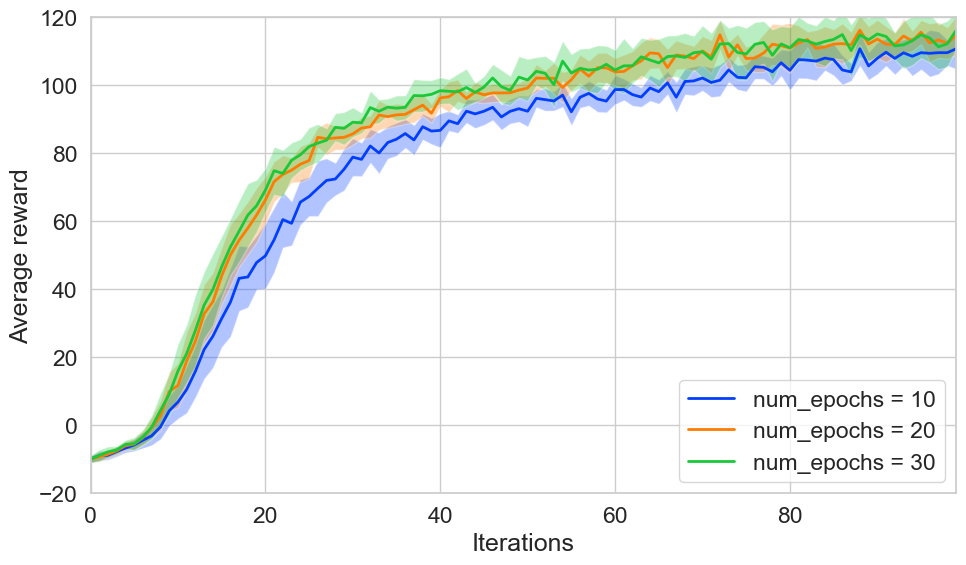

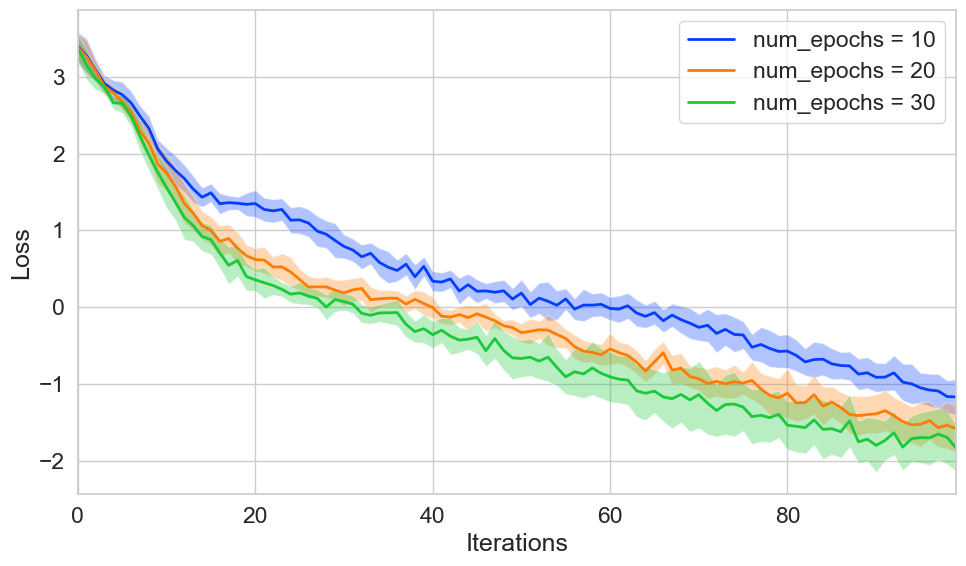

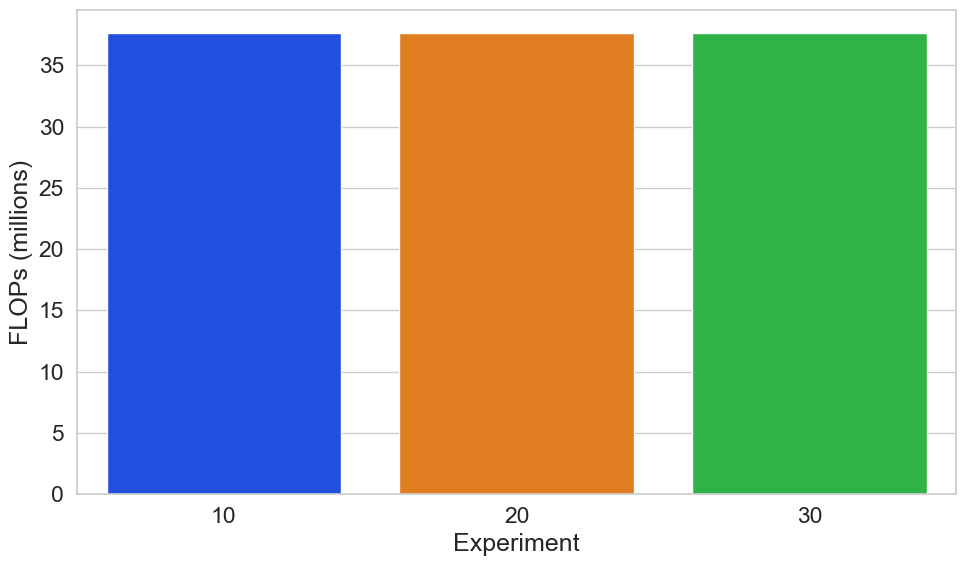

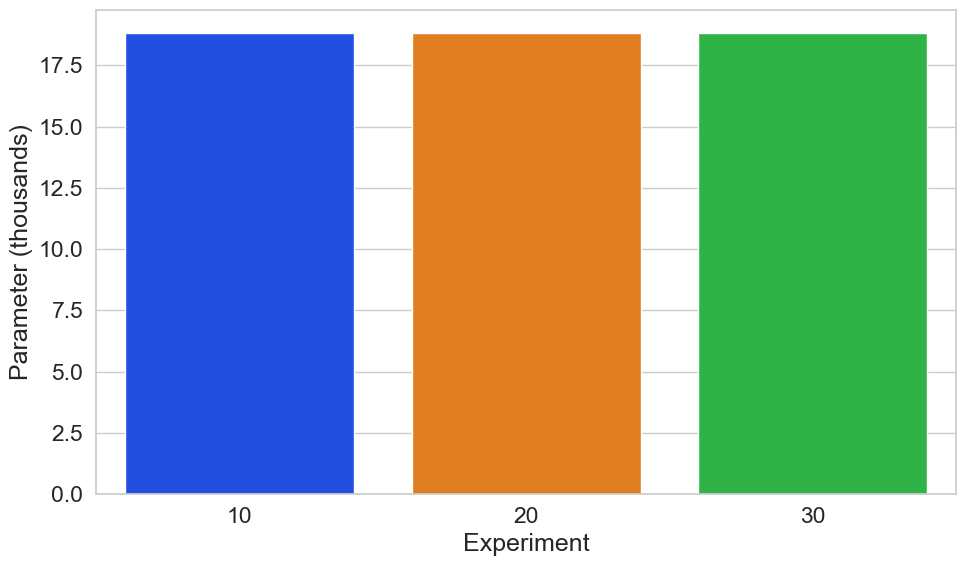

        Experiment  training_time training_memory_usage       inference_time  \
0  num_epochs = 10   68.54 ± 0.64   1.65e+03 ± 0.00e+00  4.65e-04 ± 2.09e-05   
1  num_epochs = 20  134.00 ± 0.67   3.30e+03 ± 0.00e+00  4.77e-04 ± 1.04e-05   
2  num_epochs = 30  231.14 ± 6.28   4.96e+03 ± 0.00e+00  5.55e-04 ± 2.33e-05   

    mean_rewards          loss                flops           parameters  
0  110.64 ± 5.91  -1.17 ± 0.23  3.76e+01 ± 0.00e+00  1.88e+01 ± 0.00e+00  
1  114.53 ± 5.60  -1.58 ± 0.30  3.76e+01 ± 0.00e+00  1.88e+01 ± 0.00e+00  
2  116.05 ± 5.57  -1.83 ± 0.30  3.76e+01 ± 0.00e+00  1.88e+01 ± 0.00e+00  


In [3]:
tune_epochs(EmbeddingStrategy.CONCAT, "concat_tune_epochs_102030.csv", epochs=[10, 20, 30])